# Natural Language Processing (NLP)

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

### What is NLP?

- Using computers to process (analyze, understand, generate) natural human languages
- Most knowledge created by humans is unstructured text, and we need a way to make sense of it
- Build probabilistic model using data about a language

### What are some of the higher level task areas?

- **Information retrieval**: Find relevant results and similar results
    - [Google](https://www.google.com/)
- **Information extraction**: Structured information from unstructured documents
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation**: One language to another
    - [Google Translate](https://translate.google.com/)
- **Text simplification**: Preserve the meaning of text, but simplify the grammar and vocabulary
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input**: Faster or easier typing
    - [A friend's application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis**: Attitude of speaker
    - [Hater News](http://haternews.herokuapp.com/)
- **Automatic summarization**: Extractive or abstractive summarization
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural Language Generation**: Generate text from data
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation**: Speech-to-text, text-to-speech
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering**: Determine the intent of the question, match query with knowledge base, evaluate hypotheses
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What are some of the lower level components?

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"
- **Machine learning**

### Why is NLP hard?

- **Ambiguity**:
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: text messages
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"

NLP requires an understanding of the **language** and the **world**.

## Part 1: Reading in the Yelp Reviews

- "corpus" = collection of documents
- "corpora" = plural form of corpus

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
# read yelp.csv into a DataFrame
url = 'data/yelp.csv'
yelp = pd.read_csv(url, encoding='unicode-escape')

In [3]:
# EXERCISE create a new DataFrame called yelp_best_worst 
# that only contains the 5-star and 1-star reviews
















# ANSWER
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [4]:
yelp_best_worst.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [5]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars
print y.value_counts()

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

5    3337
1     749
Name: stars, dtype: int64


In [6]:
X_train.head()

6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\r...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
Name: text, dtype: object

## Part 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [7]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [8]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [9]:
# transforming a new sentence, what do you notice?
pd.DataFrame(vect.transform(['please call yourself a cab']).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,1,0,1,0,0


In [10]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [11]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print X_train_dtm.shape
print X_test_dtm.shape
# Why do they have the same number of features

(3064, 16825)
(1022, 16825)


In [12]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100th', u'101', u'102', u'105', u'1070', u'108', u'10am', u'10ish', u'10min', u'10mins', u'10minutes', u'10pm', u'10th', u'10x', u'11', u'110', u'1100', u'111', u'111th', u'112', u'115th', u'118', u'11a', u'11am', u'11p', u'11pm', u'12', u'120', u'128i']


In [13]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


In [14]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [15]:
# EXERCISE: create a coun vectorizer that doesn't lowercase the words
# fit transform X_train and see how many features there are
# Hint there should be over 20k

In [16]:
# ANSWER
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape # has more features

(3064, 20838)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [17]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

In [18]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


**Predicting the star rating:**

In [19]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices :: only single words
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use logistic regression with document feature matrix, NOT the text column
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.925636007828


In [20]:
# calculate null accuracy, which is the accuracy of our null model (just guessing the most common thing)
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.81996086105675148

In [21]:
# EXERCISE define a function, tokenize_test,  that does five things:

# Has a single input, vect, that is a countvectorizer
# instantiates a logistic regression
# fit_transforms X using the vectorizer
# print the number of features (phrases)
# prints the output of a 5 fold cross validation using accuracy as our metric


# eg.

# vect = CountVectorizer(ngram_range=(1, 2))
# tokenize_test(vect)

# Should output:
# Features:  209471
# Accuracy:  0.933431652596

In [22]:
# ANSWER
def tokenize_test(vect):
    logreg = LogisticRegression()
    X_dtm = vect.fit_transform(X)
    print 'Features: ', X_dtm.shape[1]
    print 'Accuracy: ', cross_val_score(logreg, X_dtm, y, cv=5, scoring='accuracy').mean()

In [23]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  209471
Accuracy:  0.933431652596


## Part 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [24]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [25]:
# remove English stop words
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
tokenize_test(vect)
# made predictions worse! Why?

Features:  191336
Accuracy:  0.926581494928


In [26]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

## Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [27]:
# remove English stop words and only keep 100 features, MUCH FASTER
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.888893346555


In [28]:
# all 100 features
print vect.get_feature_names()

[u'amazing', u'area', u'asked', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'price', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'told', u'took', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', u'y

In [29]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.93612563031


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [30]:
# include 1-grams and 2-grams, and only include terms that appear at least 3 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=3)
tokenize_test(vect)

Features:  32700
Accuracy:  0.93783741955


## Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [31]:
# print the first review
print yelp_best_worst.text[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [32]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [33]:
# list the words
review.words

WordList([u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excellent', u'The', u'weather', u'was', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'grounds', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'was', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fills', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'was', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'was', u'amazing', u'While', u'EVERYTHING', 

In [34]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [35]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

## Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [36]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in review.words]

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was', u'amaz', u'while', u'everyth', u'on', u'the', u'menu', u'look', u'excel', u'i', u'ha

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [37]:
word = Word('wolves')

In [38]:
stemmer.stem(word)

u'wolv'

In [39]:
# assume every word is a noun
print [word.lemmatize() for word in review.words]

[u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'wa', u'excellent', u'The', u'weather', u'wa', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'ground', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'wa', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fill', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'wa', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredient', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'wa', u'amazing', u'While', u'EVERYTHING', u'on', u'the', u'

In [40]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

[u'My', u'wife', u'take', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'be', u'excellent', u'The', u'weather', u'be', u'perfect', u'which', u'make', u'sit', u'outside', u'overlook', u'their', u'ground', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'be', u'excellent', u'and', u'our', u'food', u'arrive', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'be', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'have', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'be', u'amaze', u'While', u'EVERYTHING', u'on', u'the', u'menu', u'l

In [41]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize(text, how='lemma'):
    words = TextBlob(text).words
    if how == 'lemma':
        return [word.lemmatize() for word in words]
    elif how == 'stem':
        return [stemmer.stem(word) for word in words]

In [43]:
# use word_tokenize LEMMA as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=lambda x: word_tokenize(x, how='lemma'))
tokenize_test(vect)

Features:  23856
Accuracy:  0.932208859444


In [44]:
# use word_tokenize STEM as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=lambda x:word_tokenize(x, how='stem'))
tokenize_test(vect)

Features:  15237
Accuracy:  0.938818413169


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [45]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [46]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [47]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [48]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [49]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

In [50]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [51]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

Features:  18883
Accuracy:  0.873473450843


## Part 8: Using TF-IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [52]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [53]:
summarize()

TOP SCORING WORDS:
washed
dish
oiliest
rinse
dishes

RANDOM WORDS:
just
washed
dishes
food
dish

This place has the oiliest food I've ever eaten in my life.  I had carry out one evening (two dishes) and the entrees were soaked in oil.  I had to rinse with water my eggplant dish three times just to eat it without feeling sick to my stomach.  I wish I could've washed the other dish too (but it wasn't one that could be washed--it was a wide-rice noodle dish).

Can definitely taste the MSG in these dishes too.

Really not sure what the fuss is about.


## Part 9: Sentiment Analysis

In [54]:
print review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [55]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [56]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895


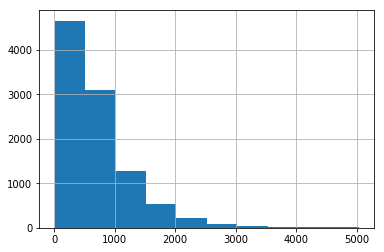

In [57]:
# Show a histogram of yelp review lengths

yelp['length'].hist()

In [58]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [59]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

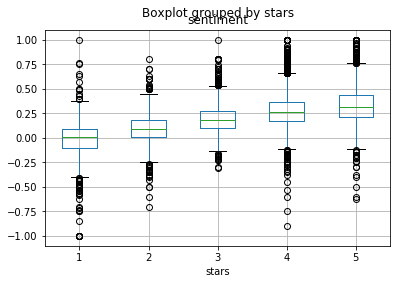

In [60]:
# EXERCISE: make a box plot of sentiment grouped by stars and a histogram of yelp sentiment
# You should have five boxplots in the same graph for sentiment for the first graph









# ANSWER


yelp.boxplot(column='sentiment', by='stars')

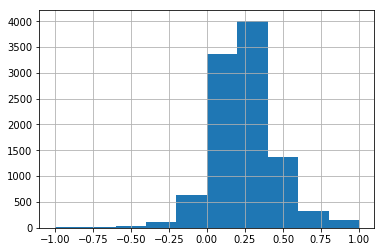

In [61]:
yelp['sentiment'].hist() # Mostly positive!

In [62]:
# EXERCISE Show the reviews with most positive sentiment (a score of 1)










# Answer 

yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [63]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [64]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [65]:
# Where sentiment can go wrong

# negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083


In [66]:
# positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


In [67]:
# reset the column display width
pd.reset_option('max_colwidth')

## Bonus: Adding Features to a Document-Term Matrix

In [68]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [69]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print X_train_dtm.shape
print X_test_dtm.shape

(3064, 16825)
(1022, 16825)


In [70]:
# the other four feature columns that I want to use to predict stars, not just text
X_train.drop('text', axis=1).head()

,sentiment,cool,useful,funny
6841,0.197778,0,0,1
1728,0.412500,0,0,0
3853,0.398148,0,0,0
671,0.129219,0,0,0
4920,0.473611,0,0,0


In [71]:
# cast other feature columns to float and convert to a sparse matrix
# Why a sparse matrix, because the other matrix is sparse and the data types must match up
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [72]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [73]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [74]:
# use logistic regression with text column only
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)

0.925636007828


In [75]:
# use logistic regression with all features
logreg = LogisticRegression()
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print metrics.accuracy_score(y_test, y_pred_class)

0.937377690802


## Bonus: Fun TextBlob Features

In [76]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [77]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]

In [78]:
# definitions
Word('bank').define('v')

[u'tip laterally',
 u'enclose with a bank',
 u'do business with a bank or keep an account at a bank',
 u'act as the banker in a game or in gambling',
 u'be in the banking business',
 u'put into a bank account',
 u'cover with ashes so to control the rate of burning',
 u'have confidence or faith in']

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible

Using a Naive Bayes SMS spam classifier using sklearn

Data source: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

[Naive Bayes / ROC_AUC Slides](slides/naive_bayes_roc_auc.pdf)

[Confusion Matricies Slides](slides/confusion_matrix.pdf)

In [79]:
## READING IN THE DATA

# read tab-separated file using pandas
import pandas as pd
%matplotlib inline

In [80]:
df = pd.read_table('data/sms.tsv', sep='\t', header=None, names=['label', 'msg'])

In [81]:
# examine the data
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


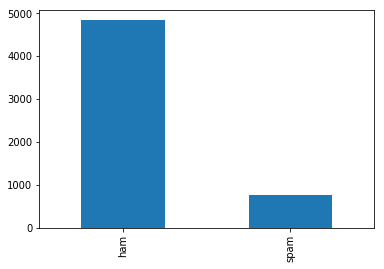

In [82]:
df.label.value_counts().plot(kind='bar')

In [83]:
# Get the null accuracy rate
df.label.value_counts() / df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [84]:
df.msg.describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: msg, dtype: object

In [85]:
# convert label to a quantitative binary variable
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label, random_state=1)

NameError: name 'df' is not defined

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# start with a simple example
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE 44!']

# learn the 'vocabulary' of the training data
vect = CountVectorizer()
train_simple_dtm = vect.fit_transform(train_simple)
vect.get_feature_names()

[u'44', u'cab', u'call', u'me', u'please', u'tonight', u'you']

In [88]:
# transform training data into a 'document-term matrix'
train_simple_dtm = vect.transform(train_simple)
train_simple_dtm

<3x7 sparse matrix of type '<type 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [89]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [90]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing)
test_simple = ["please don't call me"]
test_simple_dtm = vect.transform(test_simple)
test_simple_dtm.toarray()
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


In [91]:
## REPEAT PATTERN WITH SMS DATA

# instantiate the vectorizer
vect = CountVectorizer()

# learn vocabulary and create document-term matrix in a single step
train_dtm = vect.fit_transform(X_train)
train_dtm

<4179x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [92]:
# transform testing data into a document-term matrix
test_dtm = vect.transform(X_test)
test_dtm

<1393x7456 sparse matrix of type '<type 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [93]:
# store feature names and examine them
train_features = vect.get_feature_names()
len(train_features)
train_features[:10], train_features[-10:]

([u'00',
  u'000',
  u'008704050406',
  u'0121',
  u'01223585236',
  u'01223585334',
  u'0125698789',
  u'02',
  u'0207',
  u'02072069400'],
 [u'zed',
  u'zeros',
  u'zhong',
  u'zindgi',
  u'zoe',
  u'zoom',
  u'zouk',
  u'zyada',
  u'\xe8n',
  u'\u3028ud'])

In [94]:
# convert train_dtm to a regular array
train_arr = train_dtm.toarray()
# remember that each ROW is an sms
# and each COLUMN is a token
train_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
## SIMPLE SUMMARIES OF THE TRAINING DATA
# refresher on numpy
import numpy as np
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [96]:
sum(arr[0, :]) #sum of the first row

10

In [97]:
sum(arr[:,0]) # sum of the first column

6

In [98]:
################
### EXERCISE ###
################
# count how many times the 0th token appears across ALL messages in train_arr

In [99]:
################
### EXERCISE ###
################
#calculate the number of tokens in the 0th message in train_arr

In [100]:
np.sum(arr) # adds up all numbers

36

In [101]:
np.sum(arr, axis=0) # adds up by column

array([ 6,  8, 10, 12])

In [102]:
np.sum(arr, axis=1)  # adds up by row

array([10, 26])

In [103]:
################
### EXERCISE ###
################
# count how many times EACH token appears across ALL messages in train_arr

In [104]:
# create a dataframe with two columns, "count" and "token" that holds the token count for each token
# use the numpy sum methods
train_token_counts = pd.DataFrame({'token':train_features, 'count':np.sum(train_arr, axis=0)})
train_token_counts.sort_index(by='count', ascending=False).head()

/Users/sinanozdemir/Desktop/blackhat-vegas-ml/bh-env/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


,count,token
6656,1670,to
7420,1660,you
6542,1004,the
929,717,and
3502,683,in


In [105]:
## MODEL BUILDING WITH NAIVE BAYES
## http://scikit-learn.org/stable/modules/naive_bayes.html

# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
# make predictions on test data using test_dtm
preds = nb.predict(test_dtm)
preds

array([0, 0, 0, ..., 0, 1, 0])

In [107]:
# compare predictions to true labels
from sklearn import metrics
print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

0.988513998564
[[1203    5]
 [  11  174]]


In [108]:
# predict (poorly calibrated) probabilities and calculate AUC
probs = nb.predict_proba(test_dtm)[:, 1]
probs
print metrics.roc_auc_score(y_test, probs)

0.986643100054


In [109]:
################
### EXERCISE ###
################
# show the message text for the false positives

In [110]:
################
### EXERCISE ###
################
# show the message text for the false negatives

In [7]:
## COMPARE NAIVE BAYES AND LOGISTIC REGRESSION
## USING ALL DATA AND CROSS-VALIDATION
vect = CountVectorizer(ngram_range=(1,3), stop_words='english')
# create a document-term matrix using all data
all_dtm = vect.fit_transform(df.msg)

# instantiate logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# compare AUC using cross-validation
# note: this is slightly improper cross-validation... can you figure out why?
from sklearn.cross_validation import cross_val_score

from datetime import datetime

NameError: name 'df' is not defined

In [112]:
%%time
mean = cross_val_score(logreg, all_dtm, df.label, cv=10, scoring='accuracy').mean()
print mean

0.976848539122
CPU times: user 593 ms, sys: 6.18 ms, total: 600 ms
Wall time: 600 ms


In [113]:
%%time
mean = cross_val_score(nb, all_dtm, df.label, cv=10, scoring='accuracy').mean()
print mean
# about 7 times faster

0.967516659054
CPU times: user 87.7 ms, sys: 4.24 ms, total: 92 ms
Wall time: 90.3 ms


(array([  1.19600000e+03,   1.20000000e+01,   5.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.69000000e+02]),
 array([  1.07883379e-66,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

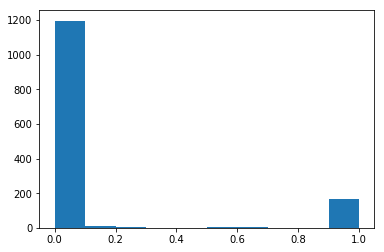

In [114]:
# predict probabilities
import matplotlib.pyplot as plt
probs = nb.predict_proba(test_dtm)[:, 1]
plt.hist(probs)

In [115]:
# use 0.5 cutoff for predicting 'spam'
import numpy as np
preds = np.where(probs > 0.5, 1, 0)
print ConfusionMatrix(list(y_test), list(preds))

NameError: name 'ConfusionMatrix' is not defined

In [ ]:
# change cutoff for predicting default to 0.2
preds = np.where(probs > 0.2, 1, 0)
print ConfusionMatrix(list(y_test), list(preds))

In [116]:
# check accuracy, sensitivity, specificity
print metrics.accuracy_score(y_test, preds)
print 175/185.  # sensitivity
print metrics.recall_score(y_test, preds)  # also sensitivity
print 1198/1208.  # specificity

0.988513998564
0.945945945946
0.940540540541
0.991721854305


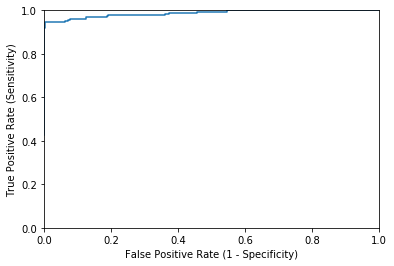

In [117]:
## ROC CURVES and AUC

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [118]:
# calculate AUC
print metrics.roc_auc_score(y_test, probs)

0.986643100054


In [119]:
# use AUC as evaluation metric for cross-validation
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression()
mean = cross_val_score(logreg, all_dtm, df.label, cv=10, scoring='roc_auc').mean()
mean

0.99001351618364075

In [120]:
# ROC/AUC are very meaningful when:
# 1. class sizes are inbalances
# 2. comparing across different binary classification models

In [121]:
## BONUS: CALCULATE THE 'SPAMMINESS' OF EACH TOKEN


# create separate DataFrames for ham and spam
df_ham = df[df.label==0]
df_spam = df[df.label==1]

In [122]:
# learn the vocabulary of ALL messages and save it
vect = CountVectorizer(ngram_range=(1,1), stop_words='english')
vect.fit(df.msg)
all_features = vect.get_feature_names()

In [123]:
# create document-term matrix of ham, then convert to a regular array
ham_dtm = vect.transform(df_ham.msg)
ham_arr = ham_dtm.toarray()
ham_dtm

<4825x8444 sparse matrix of type '<type 'numpy.int64'>'
	with 32266 stored elements in Compressed Sparse Row format>

In [124]:
# create document-term matrix of spam, then convert to a regular array
spam_dtm = vect.transform(df_spam.msg)
spam_arr = spam_dtm.toarray()
spam_dtm

<747x8444 sparse matrix of type '<type 'numpy.int64'>'
	with 11312 stored elements in Compressed Sparse Row format>

In [125]:
# count how many times EACH token appears across ALL messages in ham_arr
ham_counts = np.sum(ham_arr, axis=0)

In [126]:
# count how many times EACH token appears across ALL messages in spam_arr
spam_counts = np.sum(spam_arr, axis=0)

In [127]:
# create a DataFrame of tokens with their separate ham and spam counts
all_token_counts = pd.DataFrame({'token':all_features, 'ham':ham_counts, 'spam':spam_counts})
all_token_counts.head()

,ham,spam,token
0,0,10,00
1,0,29,000
2,1,0,000pes
3,0,2,008704050406
4,0,1,0089


In [128]:
# add one to ham counts and spam counts so that ratio calculations (below) make more sense
all_token_counts['ham'] = all_token_counts.ham + 1
all_token_counts['spam'] = all_token_counts.spam + 1

In [129]:
# calculate ratio of spam-to-ham for each token
all_token_counts['spam_ratio'] = all_token_counts.spam / all_token_counts.ham
all_token_counts.sort_index(by='spam_ratio', ascending = False).head(10)

/Users/sinanozdemir/Desktop/blackhat-vegas-ml/bh-env/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,ham,spam,token,spam_ratio
2013,1,114,claim,114.0
5934,1,94,prize,94.0
352,1,72,150p,72.0
7611,1,61,tone,61.0
369,1,52,18,52.0
3588,1,51,guaranteed,51.0
617,1,45,500,45.0
2314,1,45,cs,45.0
299,1,42,1000,42.0
1301,1,39,awarded,39.0


In [22]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [131]:
vect = CountVectorizer()
all_dtm = vect.fit_transform(df.msg)
nb = MultinomialNB()
mean = cross_val_score(nb, all_dtm, df.label, cv=10, scoring='accuracy').mean()
mean

0.98026032061360824

In [132]:
vect = TfidfVectorizer()
all_dtm = vect.fit_transform(df.msg)
nb = MultinomialNB()
mean = cross_val_score(nb, all_dtm, df.label, cv=10, scoring='accuracy').mean()
mean

0.96320881558493299

In [133]:
# A more complicated pipeline

pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer()),
        ('tf_idf', TfidfVectorizer())
  ])),
  ('classifier', MultinomialNB())
])
mean = cross_val_score(pipe, df.msg, df.label, cv=10, scoring='accuracy').mean()
mean

0.9840269835443396

In [134]:
# Not only is this PROPER cross validation of count vectorizers, its better than either model combined!

In [ ]:
# A more complicated pipeline

pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer()),
        ('tf_idf', TfidfVectorizer())
  ])),
  ('select', SelectKBest(k=2000)),  # Uses a chi squared test to select the 2000 best features
  ('classifier', MultinomialNB())
])
mean = cross_val_score(pipe, df.msg, df.label, cv=10, scoring='accuracy').mean()
mean

In [ ]:
# Pipeline can also be used with GridSearchCV, WARNING SLOWWW
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer()),
        ('tf_idf', TfidfVectorizer())
  ])),
  ('select', SelectKBest()),
  ('classifier', MultinomialNB())
])
# search for an optimal n_neighbors value using GridSearchCV
gram_range = [(1, n) for n in range(1, 3)]
param_grid = {
    'features__counts__ngram_range': gram_range,
    'features__tf_idf__ngram_range': gram_range,
}
print param_grid
print
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(df.msg, df.label)
print grid.best_score_, grid.best_params_

In [19]:
"""
Principal Component Analysis applied to the Iris dataset.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

In [ ]:
# Load in the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
pd.DataFrame(iris.data, columns=iris.feature_names).head()  # to explore the iris dataset brieflt

In [ ]:
# KNN with the original iris
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

In [ ]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('IRIS dataset with first two columns')

In [ ]:
#############################
### PCA with 2 components  ##
#############################

In [ ]:
pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

Note the axis are not the same anymore! They are no longer anything such as "sepal length" or "petal width"

In [ ]:
X_r[:5,]
# only 2 columns!!

In [ ]:
# KNN with PCAed data
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_r, y, cv=10, scoring='accuracy').mean()

In [ ]:
X_reconstituted = pca.inverse_transform(X_r)
# Turn it back into its 4 column using only 2 principal components

In [ ]:
plt.scatter(X[:,2], X[:,3])
# Original Data

In [ ]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])
# it is only looking at 2 dimensions of data!

In [ ]:
#############################
### PCA with 3 components  ##
#############################

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

X_3[:5,]

In [ ]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_3[y == i, 0], X_3[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(3 components) of IRIS dataset')

In [ ]:
# KNN with 3 components
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_3, y, cv=10, scoring='accuracy').mean()

In [ ]:
X_reconstituted = pca.inverse_transform(X_3)

In [ ]:
plt.scatter(X[:,2], X[:,3])
# Original Data

In [ ]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])

In [ ]:
#############################
### choosing components  ####
#############################


pca = decomposition.PCA(n_components=4)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

# 2 components is enough!!

In [8]:
# inspired by http://www.kdnuggets.com/2016/10/machine-learning-detect-malicious-urls.html

malicious_urls = pd.read_csv('data/malicious_urls.csv')

In [9]:
malicious_urls.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [10]:
X, y = malicious_urls['url'], malicious_urls['label']

In [11]:
y.value_counts()

good    344821
bad      75643
Name: label, dtype: int64

In [12]:
lr = LogisticRegression()

In [13]:
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8'))
    allTokens = tokensBySlash.split('/')+tokensBySlash.split('-')+tokensBySlash.split('.')
    allTokens = list(set(allTokens)) #remove redundant tokens
    if 'com' in allTokens:
        allTokens.remove('com') #removing .com since it occurs a lot of times and it should not be included in our features
    return allTokens

In [14]:
getTokens("google.com")

['google.com', 'google']

In [15]:
vect = CountVectorizer()
vect.fit_transform(X)

<420464x423929 sparse matrix of type '<type 'numpy.int64'>'
	with 2719161 stored elements in Compressed Sparse Row format>

In [16]:
vect = CountVectorizer(tokenizer=getTokens)
vect.fit_transform(X)

<420464x1507910 sparse matrix of type '<type 'numpy.int64'>'
	with 3526982 stored elements in Compressed Sparse Row format>

In [145]:
%%time
# removing no features and using sklearn pipelines

# Ask yourself, Why are we using pipelines here?


vect = CountVectorizer()

pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])
print cross_val_score(pipe, X, y, cv=3, scoring='accuracy').mean()

0.943883238372
CPU times: user 2min 55s, sys: 3.71 s, total: 2min 59s
Wall time: 3min


In [20]:
pca = decomposition.PCA(n_components=20)
pipe = Pipeline(steps=[('transform', vect), ('pca', pca), ('lr', lr)])

NameError: name 'Pipeline' is not defined

In [21]:
%%time
print cross_val_score(pipe, X, y, cv=3, scoring='accuracy').mean()

NameError: name 'pipe' is not defined

In [17]:
# Didn't work! I'll give you a custom transformer 
# that just makes any sparse matrix into a dense matrix


from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()
    
    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [23]:
pca = decomposition.PCA(n_components=20)
dense = DenseTransformer()

pipe = Pipeline(steps=[('transform', vect), ('dense', dense), ('pca', pca), ('lr', lr)])

In [ ]:
%%time
print cross_val_score(pipe, X, y, cv=3, scoring='accuracy').mean()  # Very comparable!

In [2]:
pca = decomposition.PCA(n_components=100)

pca.fit_transform(vect.fit_transform(X))

plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

NameError: name 'decomposition' is not defined

In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

In [ ]:
X.shape

In [ ]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

In [ ]:
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [ ]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

In [ ]:
# split into a training and testing set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)
# will use x_test as sample OOS data

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time

t0 = time()
logreg = LogisticRegression()
print("Fitting the classifier to the training set WITHOUT PCA")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
y_pred = clf.predict(X_test)


print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

In [ ]:
logreg = LogisticRegression()
print("Fitting the classifier to the training set")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train_pca, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

t0 = time()
###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set WITH PCA")
y_pred = clf.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

In [ ]:
# Use a pipeline to make this process easier

In [ ]:
from sklearn.pipeline import Pipeline
pca = decomposition.PCA(n_components=150, whiten=True)
logreg = LogisticRegression(C=1e-1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logreg)])

In [ ]:
cv = cross_val_score(pipe, X, y)

In [ ]:
cv

In [ ]:
cv = cross_val_score(logreg, X, y)

In [ ]:
cv

In [ ]:
# BUT for ease:
t0 = time()
logreg.fit(X, y)
logreg.predict(X)
print (time() - t0), "Seconds"

In [ ]:
t0 = time()
pipe.fit(X, y)
pipe.predict(X)
print (time() - t0), "Seconds"

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()